<a href="https://colab.research.google.com/github/minhnhat-1504/THTTNT/blob/main/BaoCao_THTTNT_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"><font color="Green">BÁO CÁO THỰC HÀNH MÔN TRÍ TUỆ NHÂN TẠO</font></h1>**
<h3>TUẦN 4 - CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC</h3>



**Họ và tên:** Lê Hoàng Minh Nhật <br>
**MSSV:** 2001230611



#BÀI TOÁN TÔ MÀU ĐỒ THỊ VÀ GIẢI THUẬT THAM LAM VỚI CHIẾN LƯỢC HẠ BẬC

## 1. Phát biểu bài toán (Problem Statement)

### 1.1. Định nghĩa
Bài toán **Tô màu đồ thị (Graph Coloring)** là một trong những bài toán kinh điển và nổi tiếng nhất trong lý thuyết đồ thị.
Cho một đồ thị vô hướng $G = (V, E)$, trong đó:
* $V$ là tập hợp các đỉnh (Vertices).
* $E$ là tập hợp các cạnh (Edges) nối giữa các đỉnh.

**Nhiệm vụ:** Gán một màu $c(v)$ cho mỗi đỉnh $v \in V$ sao cho **không có hai đỉnh kề nhau nào cùng màu**. Tức là:
$$\forall (u, v) \in E \Rightarrow c(u) \neq c(v)$$

### 1.2. Mục tiêu tối ưu
Mục tiêu là sử dụng **số lượng màu ít nhất có thể**. Số lượng màu tối thiểu cần thiết để tô màu cho đồ thị $G$ được gọi là **Sắc số (Chromatic Number)**, ký hiệu là $\chi(G)$. <br>

> Sắc số là số lượng màu tối thiểu cần thiết để tô màu cho các đỉnh của một đồ thị sao cho không có hai đỉnh kề nhau cùng màu. Đối với nhiều bài toán trong lý thuyết đồ thị, việc xác định sắc số là rất quan trọng khi cần lập kế hoạch, phân bổ tài nguyên hoặc tổ chức không gian một cách hợp lý.

### 1.3. Độ phức tạp
Việc tìm ra sắc số $\chi(G)$ chính xác cho một đồ thị bất kỳ là bài toán thuộc lớp **NP-Hard**. Với các đồ thị lớn, việc duyệt toàn bộ các khả năng để tìm nghiệm tối ưu là bất khả thi về mặt thời gian. Do đó, các thuật toán **Heuristic (như Giải thuật Tham lam)** thường được sử dụng để tìm ra lời giải *chấp nhận được* (gần tối ưu) trong thời gian ngắn.




## 2. Ứng dụng thực tế
Bài toán tô màu đồ thị có tính ứng dụng rất cao trong khoa học máy tính và đời sống:
1.  **Xếp lịch thi/Thời khóa biểu:** Các môn học là đỉnh, nếu có sinh viên học chung 2 môn thì có cạnh nối. Tô màu sao cho 2 môn kề nhau không cùng "màu" (khung giờ thi).
2.  **Phân bổ tần số vô tuyến:** Các trạm phát sóng gần nhau không được dùng chung tần số để tránh nhiễu.
3.  **Tối ưu hóa thanh ghi (Register Allocation):** Trong trình biên dịch, gán biến vào thanh ghi CPU sao cho các biến sống cùng lúc không tranh chấp thanh ghi.
4.  **Tô màu bản đồ:** Đảm bảo hai quốc gia/vùng lãnh thổ giáp ranh không cùng màu.





## 3. Ý tưởng và chiến lược giải quyết

### 3.1. Tại sao chọn đỉnh bậc cao nhất? (Heuristic)
* **Bậc của đỉnh (Degree):** Là số lượng cạnh nối với đỉnh đó.
* **Nhận định:** Đỉnh có bậc càng cao nghĩa là nó kết nối với càng nhiều đỉnh khác. Do đó, nó chịu nhiều ràng buộc nhất và cũng gây ra nhiều ràng buộc nhất cho các đỉnh xung quanh.
* **Chiến lược:** "Làm việc khó trước". Nếu ta tô màu các đỉnh bậc cao trước, ta sẽ giải quyết được các điểm "nóng" của đồ thị. Nếu để các đỉnh này lại sau cùng, khả năng cao là các đỉnh xung quanh đã dùng hết các màu, buộc ta phải thêm màu mới (tăng số lượng màu không cần thiết).

### 3.2. Tại sao phải "Hạ bậc"?
* Khi một đỉnh đã được tô màu, nó xem như "biến mất" khỏi bài toán cần giải quyết tiếp theo.
* Bậc của các đỉnh hàng xóm thực chất là "số lượng đỉnh kề *chưa được tô màu*".
* Việc cập nhật này đảm bảo tại mỗi bước, ta luôn chọn đỉnh khó nhất **trong bối cảnh hiện tại**, giúp thuật toán linh hoạt và chính xác hơn.




## 4. Thuật toán chi tiết (Pseudocode)

### Đầu vào:
* Ma trận kề $G$ kích thước $N \times N$.
* Danh sách màu $Colors$.

### Các bước thực hiện:

1.  **Khởi tạo:**
    * Tính bậc ban đầu cho tất cả các đỉnh: $Degree[v]$.
    * Tạo danh sách đánh dấu $Colored[v] = False$.
    * Biến đếm $Count = 0$.

2.  **Vòng lặp chính (While $Count < N$):**

    * **Bước 1: Lựa chọn (Select)**
        * Trong số các đỉnh *chưa tô màu* ($Colored[v] == False$), tìm đỉnh $u$ có $Degree[u]$ lớn nhất.
    
    * **Bước 2: Gán màu (Assign)**
        * Xét các đỉnh kề với $u$ đã được tô màu, lập danh sách "Màu cấm".
        * Chọn màu đầu tiên trong danh sách $Colors$ không thuộc "Màu cấm".
        * Gán màu cho $u$, đánh dấu $Colored[u] = True$.
        * Tăng $Count$.

    * **Bước 3: Hạ bậc (Update/Reduce Degree)**
        * Đặt $Degree[u] = 0$ (hoặc -1) để loại khỏi các lần xét sau.
        * Duyệt qua tất cả các đỉnh $v$ là hàng xóm của $u$. Nếu $v$ chưa tô màu:
            $$Degree[v] = Degree[v] - 1$$

### Đầu ra:
* Danh sách các cặp (Đỉnh, Màu) đã gán.






BẮT ĐẦU

    // 1. KHỞI TẠO
    VỚI MỖI đỉnh i TỪ 0 ĐẾN N-1:
        Degree[i] ← Tổng các phần tử hàng i trong ma trận G
        IsColored[i] ← False
        Colors[i] ← Null
    
    Count ← 0

    // 2. VÒNG LẶP CHÍNH (Lặp đến khi tô hết các đỉnh)
    TRONG KHI Count < N:

        // BƯỚC 1: CHỌN ĐỈNH (Selection)
        Max_Deg ← -1
        u ← -1  // u là đỉnh được chọn
        
        VỚI MỖI đỉnh i TỪ 0 ĐẾN N-1:
            NẾU (IsColored[i] == False) VÀ (Degree[i] > Max_Deg):
                Max_Deg ← Degree[i]
                u ← i
        
        // Nếu không tìm được đỉnh nào (trường hợp lỗi), thoát vòng lặp
        NẾU u == -1:
            DỪNG VÒNG LẶP

        // BƯỚC 2: TÔ MÀU (Assignment)
        Forbidden_Colors ← Tập hợp rỗng {}
        
        // Tìm các màu đã bị hàng xóm sử dụng
        VỚI MỖI đỉnh v TỪ 0 ĐẾN N-1:
            NẾU (G[u][v] == 1) VÀ (IsColored[v] == True):
                THÊM Colors[v] VÀO Forbidden_Colors
        
        // Chọn màu hợp lệ đầu tiên
        Selected_Color ← Màu đầu tiên trong Palette KHÔNG thuộc Forbidden_Colors
        
        Colors[u] ← Selected_Color
        IsColored[u] ← True
        Count ← Count + 1

        // BƯỚC 3: HẠ BẬC (Dynamic Update)
        // Loại bỏ đỉnh vừa tô khỏi tính toán (gán bậc âm hoặc 0)
        Degree[u] ← -1
        
        // Giảm bậc của các đỉnh kề chưa tô
        VỚI MỖI đỉnh v TỪ 0 ĐẾN N-1:
            NẾU (G[u][v] == 1) VÀ (IsColored[v] == False):
                Degree[v] ← Degree[v] - 1

    HẾT VÒNG LẶP

    TRẢ VỀ Colors

KẾT THÚC

**TÔ MÀU ĐỒ THỊ ĐỌC TỪ FILE TEXT**

Khối dưới đây thực hiện ghi một fle ma trận tên input_graph.txt vào GG Colab

In [1]:
# Lệnh ghi file input một ma trận kề cho bài toán tô màu đồ thị
%%writefile input_graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Writing input_graph.txt


Khối đưới đây thực hiện:
1. Đọc một file txt (là ma trận kề của đồ thị) để lưu vào một cấu trúc dữ liệu dạng mảng, trong đó mỗi phần tử là một (list)
2. Định nghĩa một lớp GraphColoring để xử lý bài toán

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


def loadGraph(filename):
    """
    Đọc file cấu trúc đồ thị và trả về ma trận kề dưới dạng array(list).

    Tham số nhận vào:
    ----------
    filename : str
        Tên file .txt chứa ma trận kề (các số cách nhau bởi khoảng trắng).

    Đầu ra (Trả về):
    ----------
    list
        Một danh sách lồng (list of lists) biểu diễn ma trận kề.
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                # Chuyển đổi dòng văn bản thành list các số nguyên
                row = [int(x) for x in line.strip().split()]
                matrix.append(row)
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

class GraphColoring:
    """
    Lớp xử lý bài toán tô màu đồ thị.
    """

    def __init__(self, adjacency_matrix):
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)
        self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        self.colors_solution = {}

        # Bảng màu (Palette)
        self.palette = [
            'Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'Cyan', 'Gray'
        ]

        # Tạo đồ thị NetworkX
        self.G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            self.G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    self.G_nx.add_edge(node_name, self.node_names[j])

        # Cố định vị trí các đỉnh (layout) để hình không bị nhảy khi vẽ lại
        self.pos = nx.spring_layout(self.G_nx, seed=42)

    def visualize_step(self, step_number, current_node_idx=None):
        """
        Hàm vẽ trạng thái hiện tại của đồ thị.

        Tham số:
            step_number: Số thứ tự bước.
            current_node_idx: Index của đỉnh đang được xử lý (để làm nổi bật).
        """
        plt.figure(figsize=(6, 4))

        # Tạo danh sách màu cho tất cả các đỉnh
        # Nếu đỉnh chưa có trong solution -> tô màu xám nhạt (lightgray)
        # Nếu đã có -> tô màu đã gán
        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                node_colors.append(self.colors_solution[name])
            else:
                node_colors.append('lightgray') # Màu mặc định chưa tô

        # Vẽ đồ thị
        nx.draw(self.G_nx, self.pos,
                node_color=node_colors,
                with_labels=True,
                node_size=1500,
                font_weight='bold',
                font_color='black',
                edge_color='gray')

        # Nếu có đỉnh đang xử lý, vẽ viền đậm hoặc tiêu đề rõ hơn
        title = f"Bước {step_number}"
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name} (Bậc cao nhất)"
            # Vẽ viền đỏ quanh đỉnh đang chọn (tùy chọn nâng cao)
            nx.draw_networkx_nodes(self.G_nx, self.pos, nodelist=[node_name], node_size=1500, edgecolors='black', linewidths=2, node_color=self.colors_solution.get(node_name, 'lightgray'))

        plt.title(title)
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán và vẽ hình sau mỗi bước.
        """
        current_degrees = []
        for i in range(self.num_vertices):
            current_degrees.append(sum(self.G_matrix[i]))

        colored_status = [False] * self.num_vertices
        count_colored = 0

        print(f"--- BẮT ĐẦU ---")

        # Vẽ trạng thái ban đầu (chưa tô màu gì)
        print("Trạng thái ban đầu:")
        self.visualize_step(0)

        # LẶP
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh ---
            max_degree = -1
            u = -1
            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1: break

            # --- TÔ MÀU ---
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_color = self.colors_solution[self.node_names[v]]
                    forbidden_colors.add(neighbor_color)

            color_idx = 0
            while self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            assigned_color = self.palette[color_idx]
            self.colors_solution[self.node_names[u]] = assigned_color
            colored_status[u] = True
            count_colored += 1

            # --- VẼ HÌNH NGAY SAU KHI TÔ MÀU ---
            print(f"-> Đã tô đỉnh {self.node_names[u]} màu {assigned_color}")
            self.visualize_step(count_colored, u)

            # --- BƯỚC 2: HẠ BẬC ---
            current_degrees[u] = 0
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

        return self.colors_solution

    def visualize(self):
        # Hàm này để vẽ kết quả cuối cùng
        self.visualize_step("HOÀN THÀNH")

Khối dưới đây thực hiện chạy chương trình chính

--- Đang đọc dữ liệu từ /content/input_graph.txt ---
Ma trận kề (Array List):
[0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0]
------------------------------
--- Đang thực hiện thuật toán ---
--- BẮT ĐẦU ---
Trạng thái ban đầu:


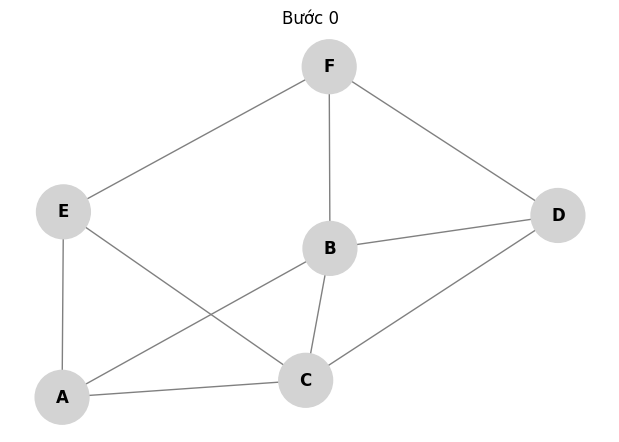

-> Đã tô đỉnh B màu Red


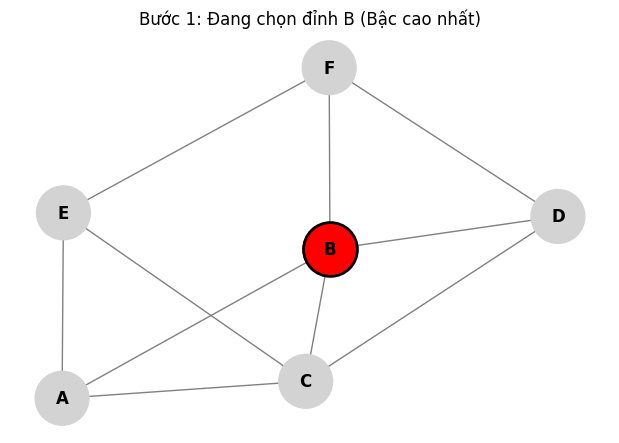

-> Đã tô đỉnh C màu Green


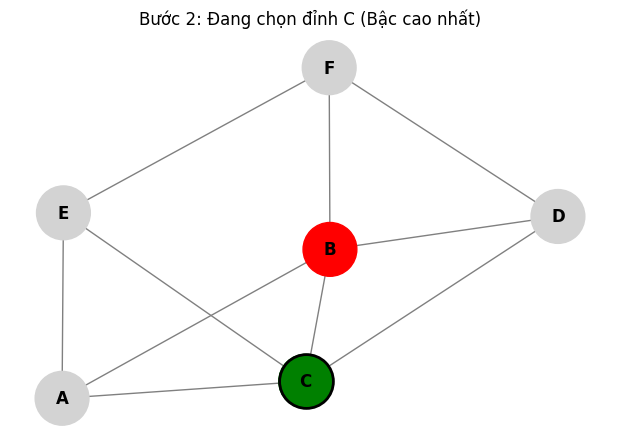

-> Đã tô đỉnh E màu Red


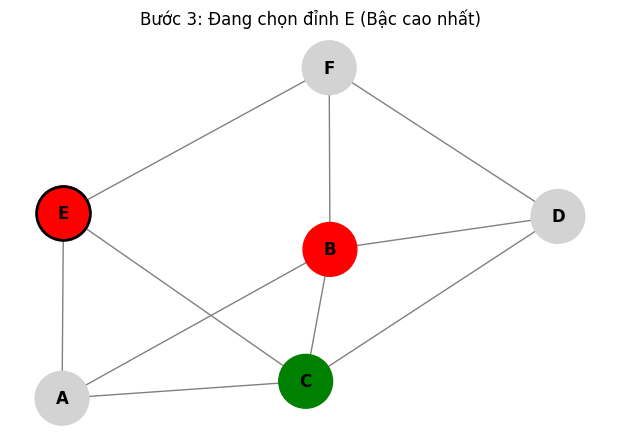

-> Đã tô đỉnh D màu Blue


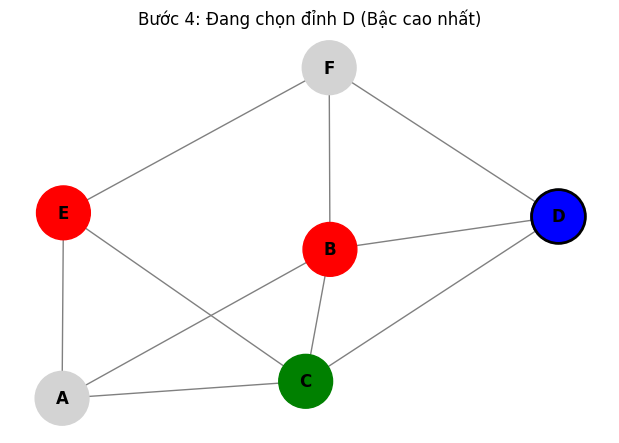

-> Đã tô đỉnh A màu Blue


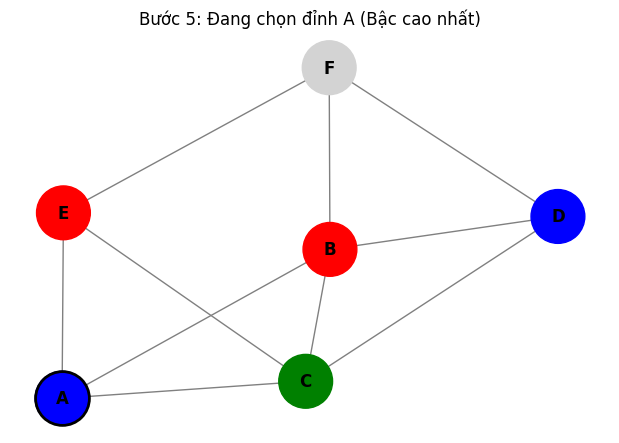

-> Đã tô đỉnh F màu Green


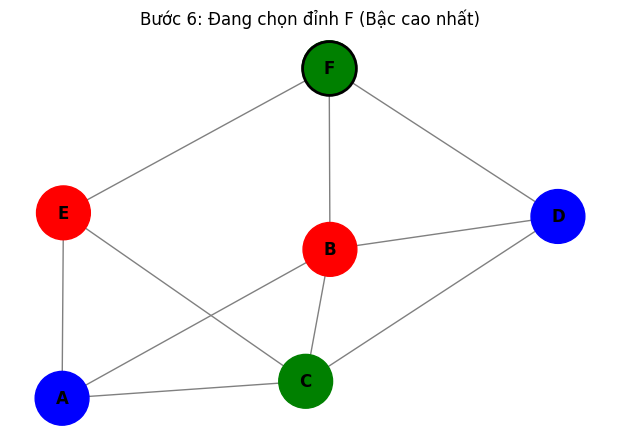

Kết quả tô màu:
Đỉnh A: Blue
Đỉnh B: Red
Đỉnh C: Green
Đỉnh D: Blue
Đỉnh E: Red
Đỉnh F: Green
------------------------------


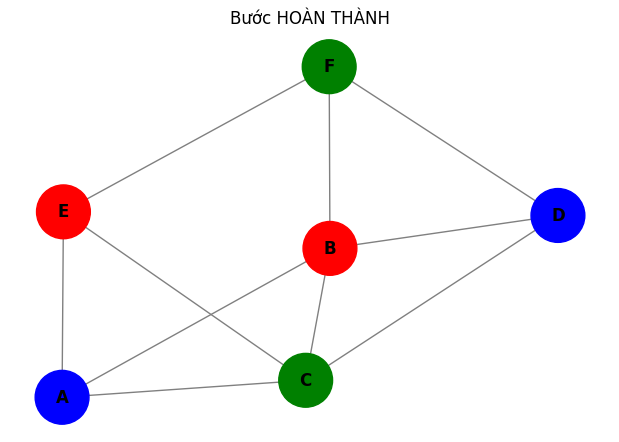

In [5]:
# 1. Tên file đầu vào
input_filename = '/content/input_graph.txt'

# 2. Gọi hàm loadGraph (trả về array/list)
print(f"--- Đang đọc dữ liệu từ {input_filename} ---")
adj_list = loadGraph(input_filename)

if len(adj_list) > 0:
    print("Ma trận kề (Array List):")
    for row in adj_list:
        print(row)
    print("-" * 30)

    # 3. Khởi tạo đối tượng
    graph_app = GraphColoring(adj_list)

    # 4. Giải quyết bài toán
    print("--- Đang thực hiện thuật toán ---")
    result = graph_app.solve()

    # In kết quả
    print("Kết quả tô màu:")
    for node in sorted(result.keys()):
        print(f"Đỉnh {node}: {result[node]}")

    # 5. Hiển thị
    print("-" * 30)
    graph_app.visualize()
else:
    print("Không thể chạy chương trình do lỗi file.")

**TÔ MÀU ĐỒ THỊ SINH NGẪU NHIÊN**

In [6]:
import random
import os

# HÀM SINH MA TRẬN NGẪU NHIÊN
def generate_random_graph_file(num_vertices, filename='random_graph.txt'):
    """
    Sinh ma trận kề ngẫu nhiên cho đồ thị vô hướng và lưu vào file.

    Tham số:
        num_vertices (int): Số lượng đỉnh người dùng muốn.
        filename (str): Tên file để lưu.
    """
    # Khởi tạo ma trận toàn số 0
    matrix = [[0] * num_vertices for _ in range(num_vertices)]
    """
    # Duyệt qua từng cặp đỉnh để gán cạnh ngẫu nhiên,
      chỉ duyệt tam giác trên (i < j) để đảm bảo tính đối xứng
    """
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            # Tỉ lệ xuất hiện cạnh (random 0 hoặc 1)
            edge_exists = random.choice([0, 1])
            matrix[i][j] = edge_exists
            matrix[j][i] = edge_exists # Đối xứng qua đường chéo chính

    # Ghi ma trận vào file .txt
    with open(filename, 'w') as f:
        for row in matrix:
            # Chuyển list số thành chuỗi: [0, 1] -> "0 1"
            line = " ".join(map(str, row))
            f.write(line + "\n")

    print(f"Đã sinh ngẫu nhiên đồ thị {num_vertices} đỉnh và lưu vào '{filename}'.")

def loadGraph(filename):
    """
    Đọc file .txt và trả về ma trận kề dạng array(list).
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                row = [int(x) for x in line.strip().split()]
                matrix.append(row)
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd # Thêm thư viện xử lý bảng

class GraphColoring:
    """
    Lớp xử lý tô màu đồ thị.
    Thuật toán hạ bậc sau mỗi lần tô.
    """

    def __init__(self, adjacency_matrix):
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)
        # Tạo tên đỉnh
        if self.num_vertices <= 26:
            self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        else:
            self.node_names = [f"V{i}" for i in range(self.num_vertices)]

        self.colors_solution = {}

        # Bảng màu
        self.palette = [
            'Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'Cyan',
            'Pink', 'Brown', 'Gray', 'Olive', 'Teal'
        ]

        # Setup đồ thị NetworkX
        self.G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            self.G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    self.G_nx.add_edge(node_name, self.node_names[j])

        self.pos = nx.spring_layout(self.G_nx, seed=100, k=0.8)

    def visualize_step(self, step_count, current_node_idx=None):
        """ Hàm vẽ đồ thị """
        plt.close('all')
        plt.figure(figsize=(6, 5))

        node_colors = []
        for name in self.G_nx.nodes():
            if name in self.colors_solution:
                node_colors.append(self.colors_solution[name])
            else:
                node_colors.append('whitesmoke')

        nx.draw_networkx_edges(self.G_nx, self.pos, edge_color='gray', width=1.5)
        nx.draw_networkx_nodes(self.G_nx, self.pos, node_color=node_colors, node_size=800, edgecolors='black')
        nx.draw_networkx_labels(self.G_nx, self.pos, font_size=10, font_weight='bold')

        title = f"Bước {step_count}"
        if current_node_idx is not None:
            node_name = self.node_names[current_node_idx]
            title += f": Đang chọn đỉnh {node_name}"
            nx.draw_networkx_nodes(self.G_nx, self.pos, nodelist=[node_name],
                                   node_size=800, node_color=self.colors_solution[node_name],
                                   edgecolors='red', linewidths=3)

        plt.title(title)
        plt.axis('off')
        plt.show()

    def solve(self):
        """
        Thực hiện thuật toán tô màu
        """
        # Tính bậc ban đầu
        current_degrees = [sum(self.G_matrix[i]) for i in range(self.num_vertices)]
        colored_status = [False] * self.num_vertices
        count_colored = 0

        # Danh sách lưu lịch sử để tạo bảng
        history_data = []

        print("--- TRẠNG THÁI BAN ĐẦU ---")
        self.visualize_step(0)

        # LẶP
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh bậc lớn nhất ---
            max_degree = -999
            u = -1
            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1: break

            # --- TÔ MÀU ---
            # Tìm màu cấm
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_name = self.node_names[v]
                    forbidden_colors.add(self.colors_solution[neighbor_name])

            # Chọn màu
            color_idx = 0
            while color_idx < len(self.palette) and self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            assigned_color = self.palette[color_idx] if color_idx < len(self.palette) else 'black'
            self.colors_solution[self.node_names[u]] = assigned_color
            colored_status[u] = True
            count_colored += 1

            # Tạo một dòng dữ liệu cho bước này
            step_record = {
                "Bước": count_colored,
                "Đỉnh chọn": self.node_names[u],
                "Bậc khi chọn": max_degree,
                "Màu tô": assigned_color,
                "Màu cấm": ", ".join(sorted(list(forbidden_colors))) if forbidden_colors else "Không"
            }

            # Lưu trạng thái bậc của TẤT CẢ các đỉnh tại bước này
            for idx, name in enumerate(self.node_names):
                # Nếu đỉnh đã tô rồi, ta đánh dấu "-" hoặc để trống
                if colored_status[idx] and idx != u:
                    step_record[f"Bậc {name}"] = "-"
                else:
                    # Ghi bậc hiện tại
                    step_record[f"Bậc {name}"] = current_degrees[idx]

            history_data.append(step_record)

            # --- BƯỚC 2: HẠ BẬC (Logic thuật toán) ---
            current_degrees[u] = -1
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1

            # Vẽ hình
            print(f"-> Đã chọn đỉnh {self.node_names[u]} (Bậc {max_degree}), tô màu {assigned_color}")
            self.visualize_step(count_colored, u)

        # Tạo DataFrame từ danh sách lịch sử
        df_report = pd.DataFrame(history_data)
        return self.colors_solution, df_report

=== CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN ===
Nhập số lượng đỉnh (Khuyên dùng 5-10): 5

1. Đang sinh ma trận ngẫu nhiên...
Đã sinh ngẫu nhiên đồ thị 5 đỉnh và lưu vào '/content/random_graph.txt'.
2. Đang đọc lại dữ liệu từ file...

3. Bắt đầu thuật toán...
--- TRẠNG THÁI BAN ĐẦU ---


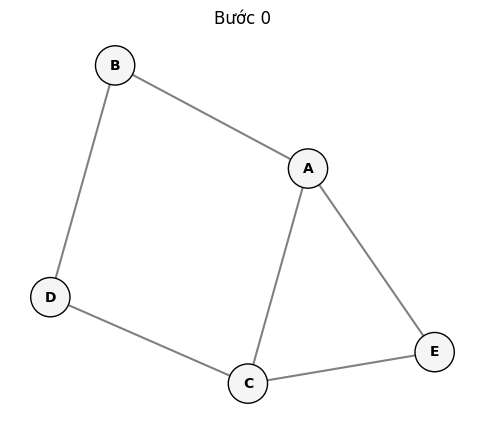

-> Đã chọn đỉnh A (Bậc 3), tô màu Red


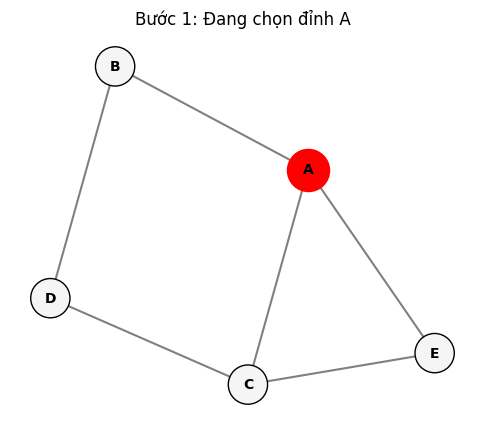

-> Đã chọn đỉnh C (Bậc 2), tô màu Green


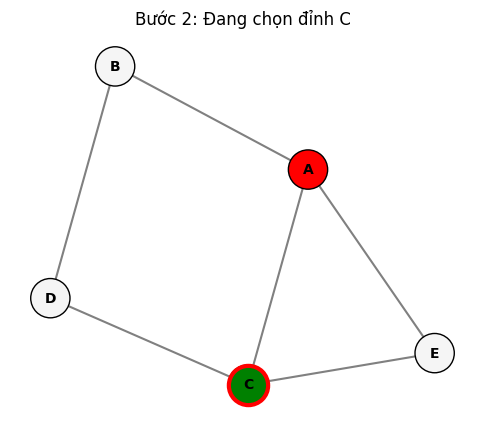

-> Đã chọn đỉnh B (Bậc 1), tô màu Green


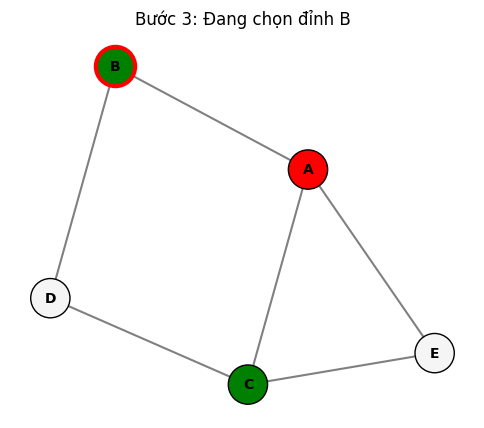

-> Đã chọn đỉnh D (Bậc 0), tô màu Red


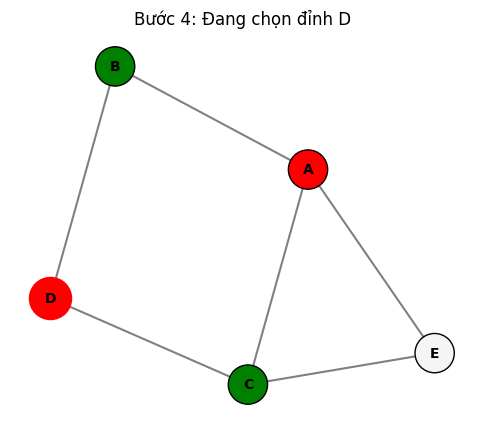

-> Đã chọn đỉnh E (Bậc 0), tô màu Blue


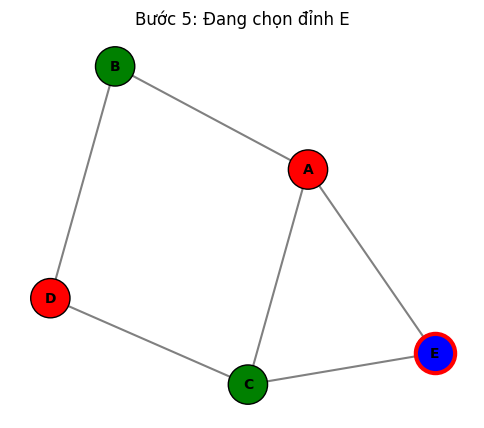


BẢNG QUÁ TRÌNH TÔ MÀU (TRACE TABLE)


,Bước,Đỉnh chọn,Bậc khi chọn,Màu tô,Màu cấm,Bậc A,Bậc B,Bậc C,Bậc D,Bậc E
0,1,A,3,Red,Không,3,2,3,2,2
1,2,C,2,Green,Red,-,1,2,2,1
2,3,B,1,Green,Red,-,1,-,1,0
3,4,D,0,Red,Green,-,-,-,0,0
4,5,E,0,Blue,"Green, Red",-,-,-,-,0



=== KẾT QUẢ CUỐI CÙNG ===
Tổng số màu sử dụng: 3
Đỉnh A: Red
Đỉnh B: Green
Đỉnh C: Green
Đỉnh D: Red
Đỉnh E: Blue


In [18]:
from IPython.display import display # Thư viện để in bảng

print("=== CHƯƠNG TRÌNH TÔ MÀU ĐỒ THỊ NGẪU NHIÊN ===")

# 1. Nhập liệu
try:
    n_input = input("Nhập số lượng đỉnh (Khuyên dùng 5-10): ")
    n = int(n_input)

    if n <= 0:
        print("Vui lòng nhập số nguyên dương > 0")
    else:
        filename = '/content/random_graph.txt'

        # 2. Sinh dữ liệu
        print("\n1. Đang sinh ma trận ngẫu nhiên...")
        generate_random_graph_file(n, filename)

        # 3. Đọc dữ liệu
        print("2. Đang đọc lại dữ liệu từ file...")
        adj_list = loadGraph(filename)

        # 4. Chạy thuật toán
        print("\n3. Bắt đầu thuật toán...")
        app = GraphColoring(adj_list)

        # Nhận về 2 giá trị: kết quả tô màu và bảng kết quả
        results, df_report = app.solve()

        # 5. Hiển thị
        print("\n" + "="*30)
        print("BẢNG QUÁ TRÌNH TÔ MÀU (TRACE TABLE)")
        print("="*30)

        # Cấu hình pandas để hiện hết các cột
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)

        # Hiển thị bảng
        display(df_report)

        # 6. Kết luận
        print("\n=== KẾT QUẢ CUỐI CÙNG ===")
        print(f"Tổng số màu sử dụng: {len(set(results.values()))}")
        # Sắp xếp theo tên đỉnh
        for node in sorted(results.keys()):
            print(f"Đỉnh {node}: {results[node]}")

except ValueError:
    print("Lỗi: Vui lòng nhập một số nguyên hợp lệ.")